### Custom version of augmented_GCN for classification

In [ ]:
# Set working directory 
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Proyectos/DEEP_LEARNING/GCNNs/Graph_CNN/augmented_gcn/classification_all-Db_undersampling
!ls

Mounted at /content/drive
/content/drive/My Drive/Proyectos/DEEP_LEARNING/GCNNs/Graph_CNN/augmented_gcn/classification_all-Db_undersampling
 actives_c5_GCN+a+g_5_activity_atomwise_512_AID1478_train.npy
 AID1478_test
 AID1478_train
 augmented_GCN_custom_4classPred_2.ipynb
 augmented_GCN_custom_4classPred_2.py
 blocks_mod.py
'Copia de augmented_GCN_custom_4classPred_2.ipynb'
'Copia de map_cluster_to_graph.ipynb'
 cost_vs_epoch.png
 drive-download-20210403T143243Z-001
 drive-download-20210403T143243Z-001.zip
 eval.py
 Graph2Property_mod.py
 helpfunc.py
 how_to_run.gdoc
 how_to_run.txt
 map_cluster_to_graph.ipynb
 __pycache__
 roc_curve_test.png
 roc_curve_valid.png
 save
 smilesToGraph_mod2.py
 test_on_top1percent
 train_mod.py


In [ ]:
# Import modules 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np

%tensorflow_version 1.x  # Ryu's GCN works with tf version 1.x (we should update it for tf 2)
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x  # Ryu's GCN works with tf version 1.x (we should update it for tf 2)`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.2


In [ ]:
# Set FLAGS for environment setting / hyperparameters 
method = 'GCN+a+g'
prop = 'activity' ### CHANGED ###
database = 'AID1478_train'
num_layer = 5 # number of convolutional layers 
epoch_size = 100
learning_rate = 0.001
decay_rate = 0.95
numDB = 1   ### This is the train num_Db ###
test_numDB = 4
unit_len = 10000

flags = tf.app.flags
FLAGS = flags.FLAGS

for name in list(flags.FLAGS):
    delattr(flags.FLAGS,name)

flags.DEFINE_string('model', method, 'GCN, GCN+a, GCN+g, GCN+a+g')
flags.DEFINE_string('output', prop, '')
flags.DEFINE_string('loss_type', 'CrossEntropy', 'Options : MSE, CrossEntropy, Hinge')  ### CHANGED ###  
flags.DEFINE_string('database', database, 'Options : ZINC, ZINC2')  ### Using MSEr 
flags.DEFINE_string('optimizer', 'Adam', 'Options : Adam, SGD, RMSProp')
flags.DEFINE_string('readout', 'atomwise', 'Options : atomwise, graph_gather')
flags.DEFINE_integer('latent_dim', 512, 'Dimension of a latent vector for autoencoder')
flags.DEFINE_integer('num_layers', num_layer, '# of hidden layers')
flags.DEFINE_integer('epoch_size', epoch_size, 'Epoch size')
flags.DEFINE_integer('batch_size', 100, 'Batch size')
flags.DEFINE_integer('save_every', 1000, 'Save every')
flags.DEFINE_float('learning_rate', learning_rate, 'Batch size')
flags.DEFINE_float('decay_rate', decay_rate, 'Batch size')
flags.DEFINE_integer('num_DB', numDB, '')
flags.DEFINE_integer('unitLen', unit_len, '')
tf.app.flags.DEFINE_string('f', '', 'kernel')

modelName = FLAGS.model + '_' + str(FLAGS.num_layers) + '_' + FLAGS.output + '_' + FLAGS.readout + '_' + str(FLAGS.latent_dim) + '_' + FLAGS.database

print("model Name: ", modelName)

model Name:  GCN+a+g_5_activity_atomwise_512_AID1478_train


In [ ]:
# Build the model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from Graph2Property_mod import Graph2Property  ### CHANGED ###
tf.reset_default_graph()
tf.set_random_seed(1234)	# For reproducibility purposes, a random seed was set
model = Graph2Property(FLAGS)



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Network Ready


In [ ]:
# restore the model if available 
path='save/'+modelName+'.ckpt'
try: 
  model.restore(path)
except Exception as e: print(e)

The passed save_path is not a valid checkpoint: save/GCN+a+g_5_activity_atomwise_512_AID1478_train.ckpt


In [ ]:
# Train the model 

import train_mod 
train_cost, test_cost = train_mod.training(model, FLAGS, modelName)

Start Training XD

train_iter :  1 , epoch :  0 , cost :   1.4888834389155827
train_iter :  2 , epoch :  0 , cost :   1.9540152850162549
train_iter :  3 , epoch :  0 , cost :   1.6331496514434485
train_iter :  4 , epoch :  0 , cost :   1.048980529996091
test_iter :  5 , epoch :  0 , cost :   0.7446929941785777
train_iter :  6 , epoch :  0 , cost :   0.6600268353972374
train_iter :  7 , epoch :  0 , cost :   0.6787741671081178
train_iter :  8 , epoch :  0 , cost :   0.9357139683929527
train_iter :  9 , epoch :  0 , cost :   0.8380064251546885
test_iter :  10 , epoch :  0 , cost :   0.7731216829874715
train_iter :  11 , epoch :  0 , cost :   0.8024256946295677
train_iter :  12 , epoch :  0 , cost :   0.6441847903415909
train_iter :  13 , epoch :  0 , cost :   0.6032581819197486
train_iter :  14 , epoch :  0 , cost :   0.6962513374659827
test_iter :  15 , epoch :  0 , cost :   0.7887172198014829
train_iter :  16 , epoch :  0 , cost :   0.8461317143486586
train_iter :  17 , epoch :  0 , co

In [ ]:
# plot cost versus epoch 
from matplotlib import pyplot

epochs = np.arange(1, FLAGS.epoch_size+1, 1)

pyplot.plot(epochs,train_cost, label='train')
pyplot.plot(epochs,test_cost, label='valid')
pyplot.xlabel('epoch')
pyplot.ylabel('cross entropy')
pyplot.legend(loc='upper right', fontsize=13, frameon=False)
pyplot.savefig("cost_vs_epoch.png")
pyplot.close()

In [ ]:
from eval import train_valid_split
from eval import pred_batches
from eval import loadTest

# load tran valid and test 
train_set, valid_set = train_valid_split(model, FLAGS, modelName)

test_database = 'AID1478_test'
test_set = loadTest(model, FLAGS, modelName, test_database, test_numDB)

# extract predictions out of batches 
Preds_train_set = pred_batches(model, train_set, FLAGS)
Preds_valid_set = pred_batches(model, valid_set, FLAGS)
Preds_test_set = pred_batches(model, test_set, FLAGS)


valid accuracy:  0.79
test accuracy:  0.8505208333333333
valid AUC:  0.8077987421383648
test AUC:  0.8028043167670091


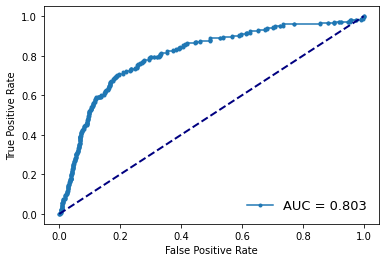

In [ ]:
# calculate accuracy score
accuracy = accuracy_score(valid_set[2], Preds_valid_set.round())
print ("valid accuracy: ", accuracy)

accuracy = accuracy_score(test_set[2], Preds_test_set.round())
print ("test accuracy: ", accuracy)

# calculate auc score & plot roc curve 
fpr, tpr, _ = roc_curve(valid_set[2], Preds_valid_set)
auc = roc_auc_score(valid_set[2], Preds_valid_set)
print ("valid AUC: ", auc)

pyplot.plot(fpr, tpr, marker='.', label='AUC = {:0.3f}'.format(auc))
pyplot.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend(loc='lower right', fontsize=13, frameon=False)
# save the plot
pyplot.savefig('roc_curve_valid.png')
pyplot.close()

fpr, tpr, _ = roc_curve(test_set[2], Preds_test_set)
auc = roc_auc_score(test_set[2], Preds_test_set)
print ("test AUC: ", auc)

pyplot.plot(fpr, tpr, marker='.', label='AUC = {:0.3f}'.format(auc))
pyplot.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend(loc='lower right', fontsize=13, frameon=False)
# save the plot
pyplot.savefig('roc_curve_test.png')